In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# データの取得

In [25]:
train = pd.read_csv('datasciencelondon_train.csv')
train_label = pd.read_csv('datasciencelondon_trainlabel.csv')
test = pd.read_csv('datasciencelondon_test.csv')

# 前処理

In [4]:
#train,testのcolumnsの値を1行目にコピーし、追加分のtrain_labelを作成
train1 = pd.DataFrame.from_dict(dict(zip(train.columns, list(map(float, train.columns)))), orient='index').T
train_label1 = pd.DataFrame.from_dict(dict(zip(train_label.columns, list(map(int, train_label.columns)))), orient='index').T
test1 = pd.DataFrame.from_dict(dict(zip(test.columns, list(map(float, test.columns)))), orient='index').T

In [30]:
#train,train_label,testを更新
train = pd.concat([train1, train], ignore_index=True)
train_label = pd.concat([train_label1, train_label], ignore_index=True)
test = pd.concat([test1, test], ignore_index=True)

In [31]:
#train,train_label,testのindex,columnsを更新
train.index = [n+1 for n in range(len(train.index))]
train_label.index = [n+1 for n in range(len(train.index))]
test.index = [n+1 for n in range(len(test.index))]
train.columns = [n+1 for n in range(len(train.columns))]
train_label.columns = ['label']
test.columns = [n+1 for n in range(len(test.columns))]

# 特徴量の作成

In [9]:
X = train
X_test = test

# モデル学習

In [10]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import mean_squared_error

In [11]:
lin = LinearRegression()
rid = Ridge()
log = LogisticRegression()

In [12]:
y = train_label

In [13]:
X_train, X_val, y_train, y_val = train_test_split(X, y, train_size=0.99, random_state=1)

/usr/local/lib/python3.6/site-packages/sklearn/model_selection/_split.py:2010: FutureWarning: From version 0.21, test_size will always complement train_size unless both are specified.
  FutureWarning)


In [14]:
lin.fit(X_train, y_train)
rid.fit(X_train, y_train)
log.fit(X_train, y_train)

/usr/local/lib/python3.6/site-packages/scipy/linalg/basic.py:1018: RuntimeWarning: internal gelsd driver lwork query error, required iwork dimension not returned. This is likely the result of LAPACK bug 0038, fixed in LAPACK 3.2.2 (released July 21, 2010). Falling back to 'gelss' driver.
  warnings.warn(mesg, RuntimeWarning)
/usr/local/lib/python3.6/site-packages/sklearn/utils/validation.py:547: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [15]:
print('Linear:', lin.score(X_train, y_train))
print('Ridge:', rid.score(X_train, y_train))
print('Logistic:', log.score(X_train, y_train))

Linear: 0.467102579555
Ridge: 0.470651670325
Logistic: 0.836363636364


In [16]:
pre_val_lin = lin.predict(X_val)
pre_val_rid = rid.predict(X_val)
pre_val_log = log.predict(X_val)

In [17]:
print('Linear:', mean_squared_error(y_val, pre_val_lin))
print('Ridge:', mean_squared_error(y_val, pre_val_rid))
print('Logistic:', mean_squared_error(y_val, pre_val_log))

Linear: 0.0970035667768
Ridge: 0.0935431679955
Logistic: 0.1


# データの可視化

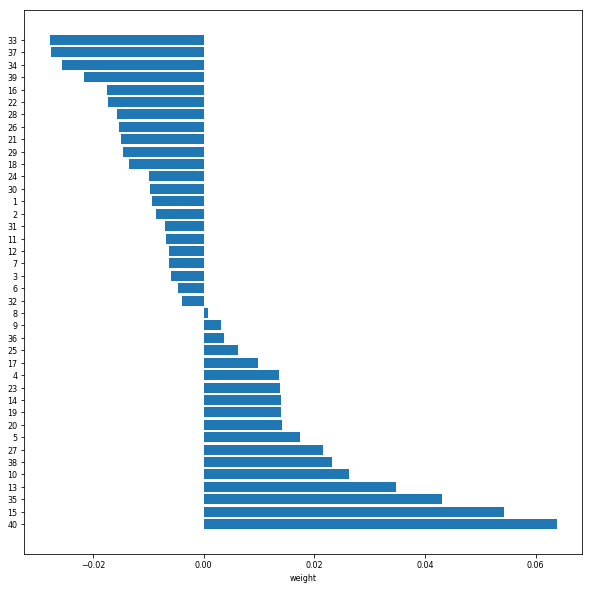

In [18]:
coef = sorted(dict(zip(X_val.columns, rid.coef_[0])).items(), key=lambda x: -x[1])
x_values = np.linspace(1, len(coef), len(coef))
x_name = [coef_i[0] for coef_i in coef]
y_values = [coef_i[1] for coef_i in coef]
plt.figure(figsize=(10,10))
plt.rcParams['font.size'] = 8
plt.barh(x_values, y_values)
plt.xlabel('weight')
plt.yticks(x_values, x_name)
#plt.ylim(0, )
plt.show()

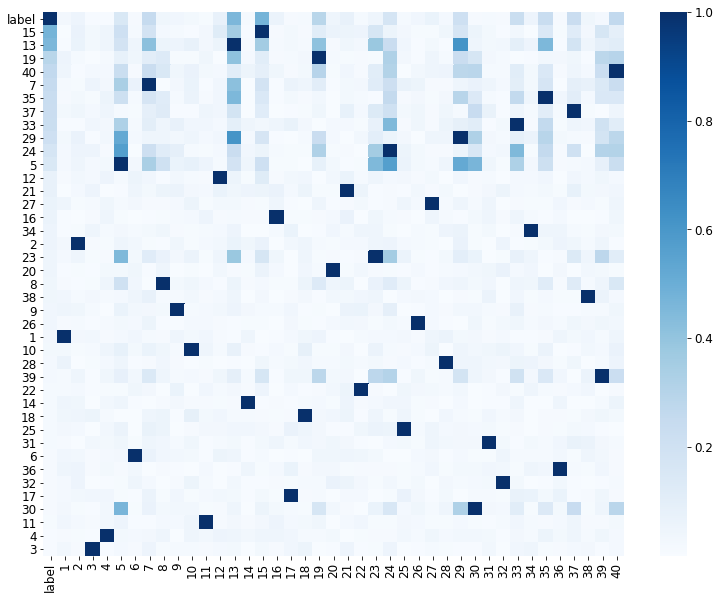

In [19]:
train_join = y.join(X)
plt.figure(figsize=(13,10))
plt.rcParams['font.size'] = 12
sns.heatmap(abs(train_join.corr()).sort_values(by=['label'], ascending=False), cmap='Blues')
plt.show()